In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [85]:
import string
import nltk
from nltk.corpus import stopwords
import re

In [86]:
import random
import collections
from tabulate import tabulate
from wordcloud import WordCloud

# Inicijalna analiza skupa

In [87]:
data = pd.read_csv('dataset/IMDB_Dataset.csv')

In [88]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [89]:
data.shape

(50000, 2)

In [90]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


positive    25000
negative    25000
Name: sentiment, dtype: int64


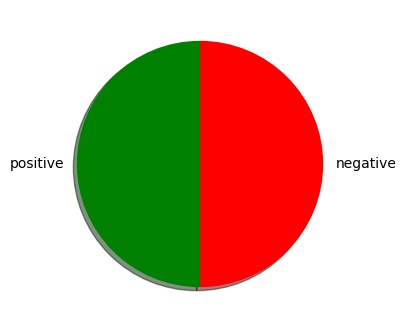

In [92]:
# skup je balansiran
print(data.sentiment.value_counts())
plt.figure(figsize=(4,4))
plt.pie(x=data.sentiment.value_counts(), colors=['green', 'red'], labels=['positive', 'negative'], startangle=90, shadow=True)
plt.show()

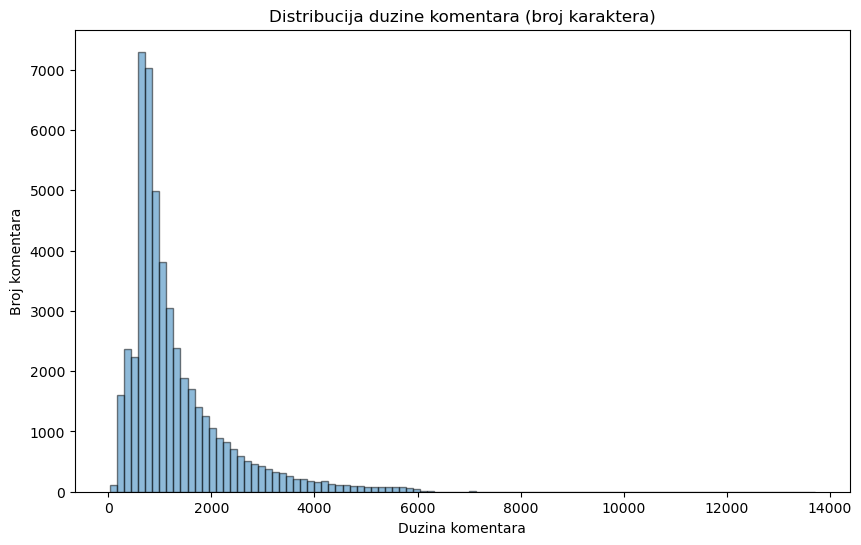

In [93]:
# vizuelizacija distribucije duzine komentara u skupu
plt.figure(figsize=(10, 6))
lengths = np.array([len(sample) for sample in data.review])
plt.hist(x=lengths, bins=100, histtype='bar', ec='black', alpha=0.5)
plt.title('Distribucija duzine komentara (broj karaktera)')
plt.xlabel('Duzina komentara')
plt.ylabel('Broj komentara')

# to do: plotovati (pomerenu?) normalnu raspodelu preko histograma
#mean = np.mean(lenghts)
#stdev = np.std(lenghts)

plt.show()

In [94]:
max_len_index = np.argmax(lengths)
print(f'Duzina najduzeg komentara: {len(data.review[max_len_index])}\nNajduzeg komentara: {data.review[max_len_index]}')

Duzina najduzeg komentara: 13704
Najduzeg komentara: Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle r

In [95]:
min_len_index = np.argmin(lengths)
print(f'Duzina najkraceg komentara: {len(data.review[min_len_index])}\nNajkraci komentar: {data.review[min_len_index]}')

Duzina najkraceg komentara: 32
Najkraci komentar: Read the book, forget the movie!


In [96]:
average_length = np.mean(lengths)
median_length = np.median(lengths)
std_dev = np.std(lengths)
print(f'Prosecna duzina komentara: {average_length}\nMedijana duzine komentara: {median_length}\
        \nStandardna devijacija duzine komentara: {std_dev}')

Prosecna duzina komentara: 1309.43102
Medijana duzine komentara: 970.0        
Standardna devijacija duzine komentara: 989.7181170827175


In [97]:
# duzine pozitivno label-ovanih komentara
pos_lengths = np.array([len(data.review[i]) for i in range(len(data.review)) if data.sentiment[i] == 'positive'])
# duzine negativno label-ovanih komentara
neg_lengths = np.array([len(data.review[i]) for i in range(len(data.review)) if data.sentiment[i] == 'negative'])

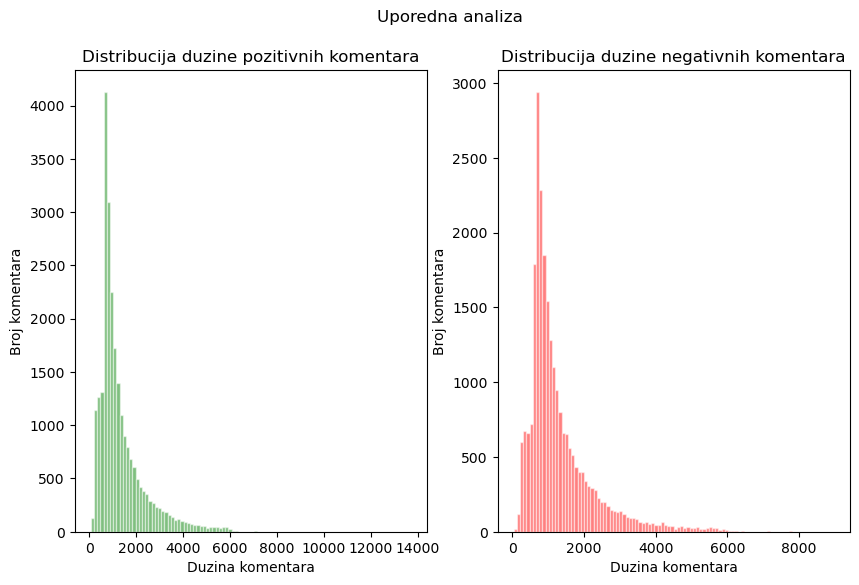

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(x=pos_lengths, bins=100, histtype='bar', color='green', ec='white', alpha=0.5)
ax1.set_title('Distribucija duzine pozitivnih komentara')
ax1.set_xlabel('Duzina komentara')
ax1.set_ylabel('Broj komentara')

ax2.hist(x=neg_lengths, bins=100, histtype='bar', color='red', ec='white', alpha=0.5)
ax2.set_title('Distribucija duzine negativnih komentara')
ax2.set_xlabel('Duzina komentara')
ax2.set_ylabel('Broj komentara')

fig.suptitle('Uporedna analiza')

plt.show()

In [99]:
average_pos_length = np.mean(pos_lengths)
median_pos_length = np.median(pos_lengths)
std_dev_pos = np.std(pos_lengths)
max_pos_len = np.max(pos_lengths)
min_pos_len = np.min(pos_lengths)


average_neg_length = np.mean(neg_lengths)
median_neg_length = np.median(neg_lengths)
std_dev_neg = np.std(neg_lengths)
max_neg_len = np.max(neg_lengths)
min_neg_len = np.min(neg_lengths)


stats = [['Prosek',average_pos_length, average_neg_length], ['Medijana', median_pos_length, median_neg_length], 
        ['Standardna devijacija', std_dev_pos, std_dev_neg], ['Maks vrednost', max_pos_len, max_neg_len], 
        ['Min vrednost', min_pos_len, min_neg_len]]

print(tabulate(stats, headers=['Statistika', 'Pozitivni', 'Negativni'], floatfmt=".2f"))

Statistika               Pozitivni    Negativni
---------------------  -----------  -----------
Prosek                     1324.80      1294.06
Medijana                    968.00       973.00
Standardna devijacija      1031.47       945.87
Maks vrednost             13704.00      8969.00
Min vrednost                 65.00        32.00


In [100]:
# broj recenica u svakom komentaru
num_sentences = np.array([len(nltk.tokenize.sent_tokenize(review)) for review in data.review])
num_sentences[:10]

array([10,  7,  4,  6,  9,  6,  1,  9,  7,  3])

In [101]:
# primer nasumicno odabranog komentara i broj recenica u njemu
r = random.randrange(0, len(data.review))
rand_review = data.review[r]
num_sen = num_sentences[r]
print(f'Nasumicno odabrani komentar: {rand_review}\nBroj recenica u njemu: {num_sen}')

Nasumicno odabrani komentar: You can't take this movie seriously.....the plot is predictable and trite, the acting often over the top, the dialog laughable; but it all adds up to great fun! Three "career girls" in the late 1950's find their way to the BIG city and all the evils and temptations their mothers probably warned them about: married men, alcohol, premarital sex, abortion, etc.<br /><br />Then there's Amanda Farrell (Joan Crawford) who did succeed professionally, but whose personal life has been sacrificed for an office with her name on the door.<br /><br />This movie may have been believable 50 years ago, but now it's just great campy fun! Rent/buy it and enjoy.
Broj recenica u njemu: 3


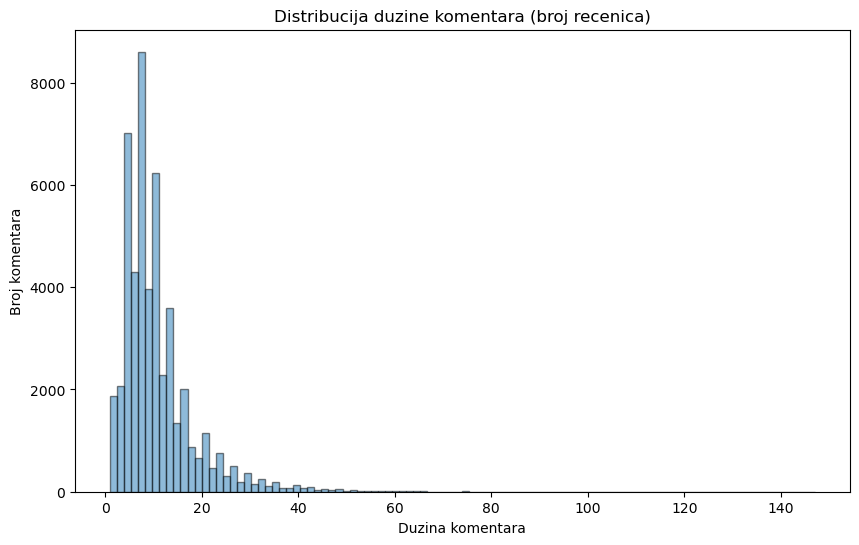

In [102]:
# vizuelizacija distribucije broja recenica u komentarima u skupu
plt.figure(figsize=(10, 6))
plt.hist(num_sentences, bins=100, histtype='bar', ec='black', alpha=0.5)
plt.title('Distribucija duzine komentara (broj recenica)')
plt.xlabel('Duzina komentara')
plt.ylabel('Broj komentara')

plt.show()

In [103]:
average_sen = np.mean(num_sentences)
median_sen = np.median(num_sentences)
std_dev_sen = np.std(num_sentences)
max_sen = np.max(num_sentences)
min_sen = np.min(num_sentences)
print(f'Prosecan broj recenica u komentaru: {average_sen}\nMedijana broja recenica: {median_sen}\
        \nStandardna devijacija broja recenica u komentaru: {std_dev_sen}')
print(f'Najveci broj recenica u komentaru: {max_sen}\nNajmanji broj recenica u komentaru: {min_sen}')

Prosecan broj recenica u komentaru: 10.70974
Medijana broja recenica: 9.0        
Standardna devijacija broja recenica u komentaru: 7.725731624409431
Najveci broj recenica u komentaru: 147
Najmanji broj recenica u komentaru: 1


In [104]:
# za potrebe brojanja broja reci u komentarima izbacujemo znake interpunkcije
def simple_tokenization(review):
    tokens = nltk.tokenize.word_tokenize(review)
    tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]
    return tokens_without_punctuation

In [105]:
# jednostavna tokenizacija proizvoljnog komentara
simple_tokenization(data.review[random.randrange(0, len(data.review))])

['This',
 'exploration',
 'of',
 'a',
 'unique',
 'decade',
 'in',
 'US',
 'cinema',
 'begins',
 'with',
 'the',
 'fall',
 'of',
 'one',
 'ailing',
 'out-of-touch',
 'empire',
 'and',
 'culminates',
 'with',
 'the',
 'unstoppable',
 'rise',
 'of',
 'another',
 'equally',
 'associated',
 'with',
 'escapism',
 'and',
 'box',
 'office',
 'receipts',
 'Meet',
 'the',
 'new',
 'boss',
 'same',
 'as',
 'the',
 'old',
 'boss',
 'Or',
 'as',
 'Peter',
 'Fonda',
 'observed',
 'in',
 'Easy',
 'Rider',
 '``',
 'We',
 'blew',
 'it',
 "''",
 'In',
 'between',
 'from',
 'Bonnie',
 'And',
 'Clyde',
 'to',
 'Star',
 'Wars',
 'the',
 'young',
 'Turks',
 'some',
 'under',
 'the',
 'guerrilla',
 'tutelage',
 'of',
 'Roger',
 'Corman',
 'were',
 'creeping',
 'under',
 'the',
 'wires',
 'to',
 'produce',
 'some',
 'of',
 'the',
 'greatest',
 'artworks',
 'of',
 'the',
 '20th',
 'century',
 'While',
 'the',
 'story',
 'is',
 'already',
 'familiar',
 'from',
 'Peter',
 'Biskind',
 "'s",
 'Easy',
 'Riders',
 

In [106]:
# broj reci po komentaru za pozitivne
words_rev_pos = np.array([len(simple_tokenization(review)) for review in data[data['sentiment']=='positive']['review']])
# broj reci po komentaru za negativne
words_rev_neg = np.array([len(simple_tokenization(review)) for review in data[data['sentiment']=='negative']['review']])

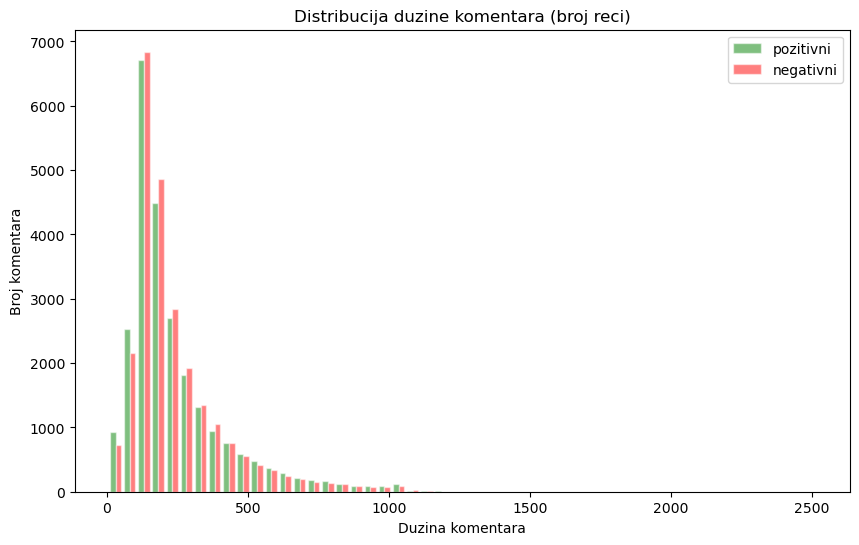

In [107]:
plt.figure(figsize=(10, 6))
plt.hist([words_rev_pos, words_rev_neg], bins=50, histtype='bar', color=['green', 'red'], ec='white', alpha=0.5, label=['pozitivni', 'negativni'])
plt.title('Distribucija duzine komentara (broj reci)')
plt.xlabel('Duzina komentara')
plt.ylabel('Broj komentara')
plt.legend(loc='upper right')
plt.show()

In [108]:
average_pos_word = np.mean(words_rev_pos)
median_pos_word = np.median(words_rev_pos)
std_dev_pos_word = np.std(words_rev_pos)
max_pos_word = np.max(words_rev_pos)
min_pos_word = np.min(words_rev_pos)


average_neg_word = np.mean(words_rev_neg)
median_neg_word = np.median(words_rev_neg)
std_dev_neg_word = np.std(words_rev_neg)
max_neg_word = np.max(words_rev_neg)
min_neg_word = np.min(words_rev_neg)


stats = [['Prosek', average_pos_word, average_neg_word], ['Medijana', median_pos_word, median_neg_word], 
        ['Standardna devijacija', std_dev_pos_word, std_dev_neg_word], ['Maks vrednost', max_pos_word, max_neg_word], 
        ['Min vrednost', min_pos_word, min_neg_word]]

print(tabulate(stats, headers=['Statistika', 'Pozitivni', 'Negativni'], floatfmt=".2f"))

Statistika               Pozitivni    Negativni
---------------------  -----------  -----------
Prosek                      241.84       239.48
Medijana                    179.00       182.00
Standardna devijacija       184.33       172.02
Maks vrednost              2515.00      1620.00
Min vrednost                 10.00         6.00


In [109]:
# zamena kratkih formi
def short_form_transform(text):
    text=re.sub("isn't", 'is not', text)
    text=re.sub("aren't", 'are not', text)
    text=re.sub("he's", 'he is', text)
    text=re.sub("wasn't", 'was not',text)
    text=re.sub("there's", 'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("can't", 'can not', text)
    text=re.sub("won't", 'will not',text)
    text=re.sub("they're", 'they are',text)
    text=re.sub("she's", 'she is',text)
    text=re.sub("wouldn't", 'would not',text)
    text=re.sub("haven't", 'have not',text)
    text=re.sub("that's", 'that is',text)
    text=re.sub("you've", 'you have',text)
    text=re.sub("he's", 'he is',text)
    text=re.sub("what's", 'what is',text)
    text=re.sub("weren't", 'were not',text)
    text=re.sub("we're", 'we are',text)
    text=re.sub("hasn't", 'has not',text)
    text=re.sub('i’d','i would',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("i've", 'i have', text)
    text=re.sub("you've", 'you have', text)
    text=re.sub("we've", 'we have', text)
    text=re.sub("they've",'they have',text)
    text=re.sub("you'll",'you will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("doesn't", 'does not',text)
    text=re.sub("didn't", 'did not', text)
    text=re.sub("hadn't", 'had not', text)
    text=re.sub("mightn't", 'might not', text)
    text=re.sub("mustn't", 'must not', text)
    text=re.sub("it's",'it is',text)
    return text

# eliminacija html tagova
def strip_html(review):
    return re.sub('<[^<]+?>', '', review)

# eliminacija url-ova
def strip_url(review):
    return re.sub(r'http\S+', '', review)

# c.g.i -> cgi, u.s.a -> usa
def full_stop_abbrev_elim(review):
    pattern = re.compile(r'\b(?:[a-z]\.){2,}', re.I)
    review = pattern.sub(lambda m: m.group().replace('.',''), review)
    return review

# za dalju analizu ni stop reci nam nisu znacajne (njihovo cesto pojavljivanje ne svedoci necemu znacajnom)
def remove_stop_words(tokens):
    stopwords_list = stopwords.words('english')
    tokens_without_stop = [token.strip() for token in tokens if token.strip() not in stopwords_list]
    return tokens_without_stop

def transform_text(review):
    review = review.lower()
    review = short_form_transform(review)
    review = strip_html(review)
    review = strip_url(review)
    review = full_stop_abbrev_elim(review)
    tokens = simple_tokenization(review)
    tokens = remove_stop_words(tokens)
    tokens = [token for token in tokens if len(token) > 2]
    return " ".join(list(map(lambda token: token.lower(), tokens)))

In [110]:
# transformacija proizvoljnog komentara
transform_text(data.review[random.randrange(0, len(data.review))])

'director ramin niami delivers goods somewhere city hilarious farce believe tradition mel brooks comedy niami pokes fun new york society creating believable eccentric tragic characters one tenement apartment building bringing life opening one shots introduce peter stormare performance gay shakespearean actor absolutely award worthy film general good job showing hopelessness laugh-ability self-centered ambition sandra bernhard cast perfectly straight self-obsessed therapist really enjoyed sandra performance immensely especially since really big fan bai ling ornella muti bulle ogier round international ensemble par excellence loved scene robert john burke gang idiot criminals could plan robbery lives depended cameo appearance mayor koch solid performance paul anthony stewart revolutionary momma boy somewhere city entertains without missing beat'

In [111]:
# sada cemo prikazati WordCloud i videti koje se to reci najcesce pojavljuju u pozitivnim komentarima
all_words_pos = " ".join([transform_text(review) for review in data[data['sentiment']=='positive']['review']])

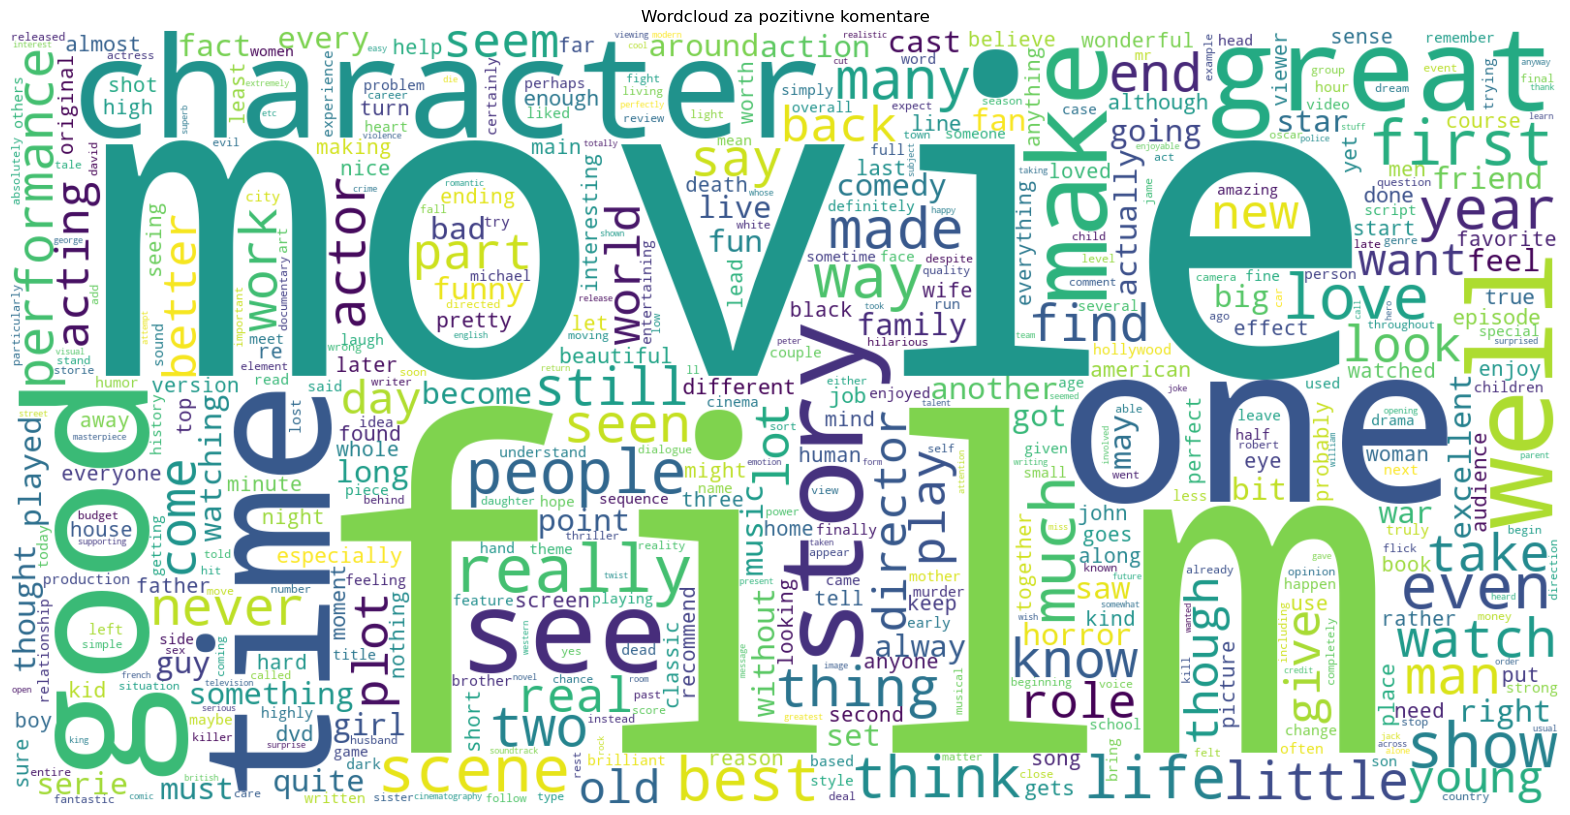

In [112]:
plt.figure(figsize=(20,20))
# normalize_plurals - reci u mnozini gleda kao da su u jednini, collocations - ukljucivanje bigrama
wc = WordCloud(max_words=500, width=1600, height=800, background_color='white', normalize_plurals=True, collocations=False).generate(all_words_pos)
plt.axis('off')
plt.title('Wordcloud za pozitivne komentare')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [113]:
# isto za negativne
all_words_neg = " ".join([transform_text(review) for review in data[data['sentiment']=='negative']['review']])

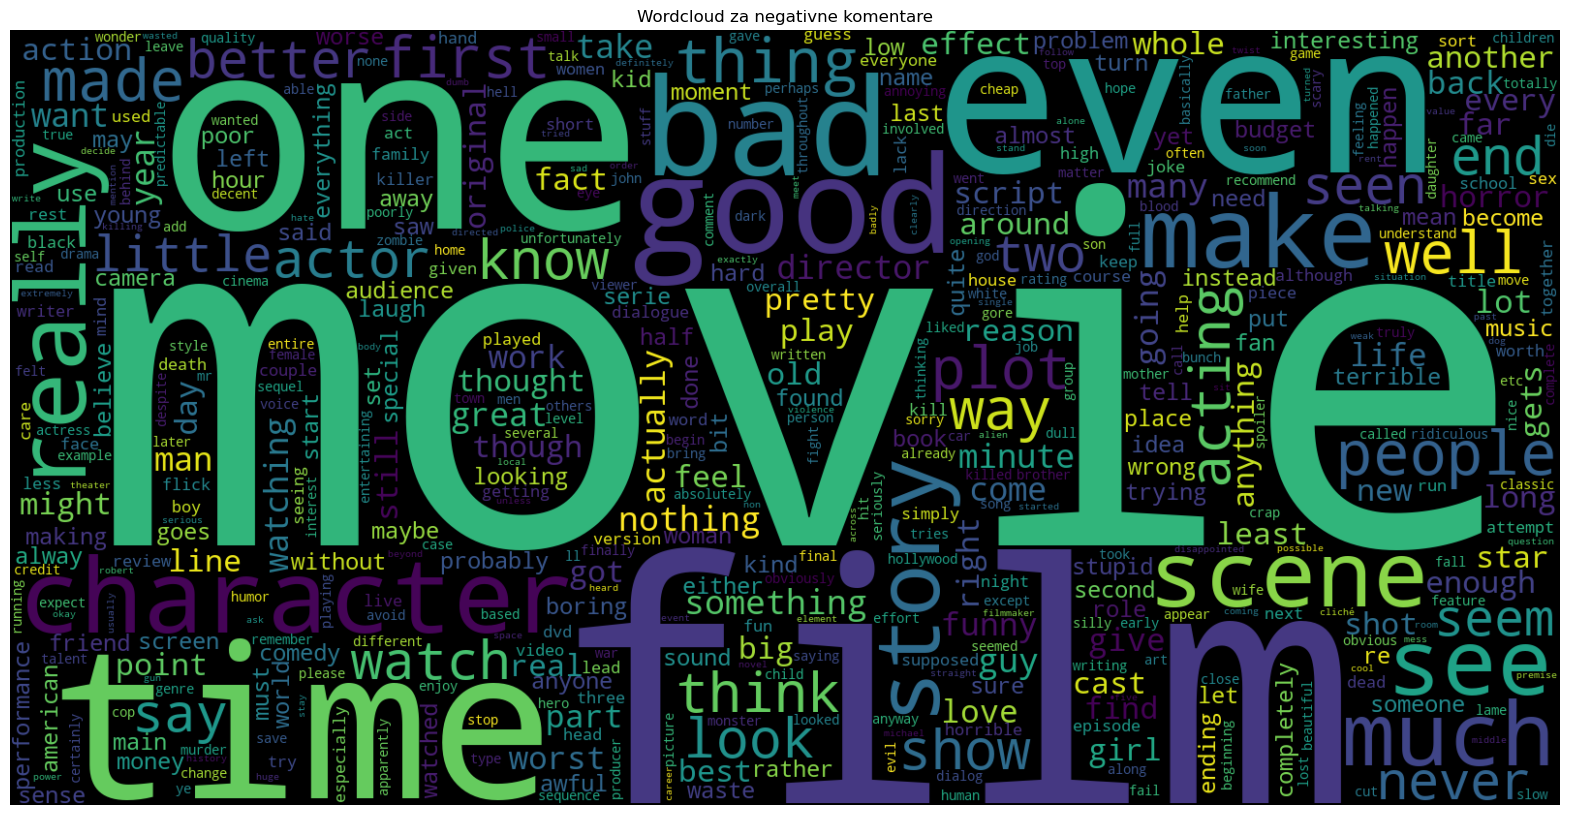

In [114]:
# reci poput: movie, film, one najcesce i kod pozitivnih i kod negativnih...
plt.figure(figsize=(20,20)) 
wc = WordCloud(max_words=500, width=1600, height=800, background_color='black', normalize_plurals=True, collocations=False).generate(all_words_neg)
plt.axis('off')
plt.title('Wordcloud za negativne komentare')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [115]:
# f-ja koja nalazi najcescih k n-grama u tekstu - n-grami se pokazali se kao znacajno informativniji od pojedinacnih reci
def ngrams(text, n=2, k=10):
    words = [word for word in text.split()]
    temp = zip(*[words[i:] for i in range(n)])
    ngram_counts = collections.Counter(temp)
    return ngram_counts.most_common(k)

In [116]:
# 20 najcescih bigrama u pozitivnim komentarima
freq_pos_2grams = ngrams(all_words_pos, n=2, k=20)

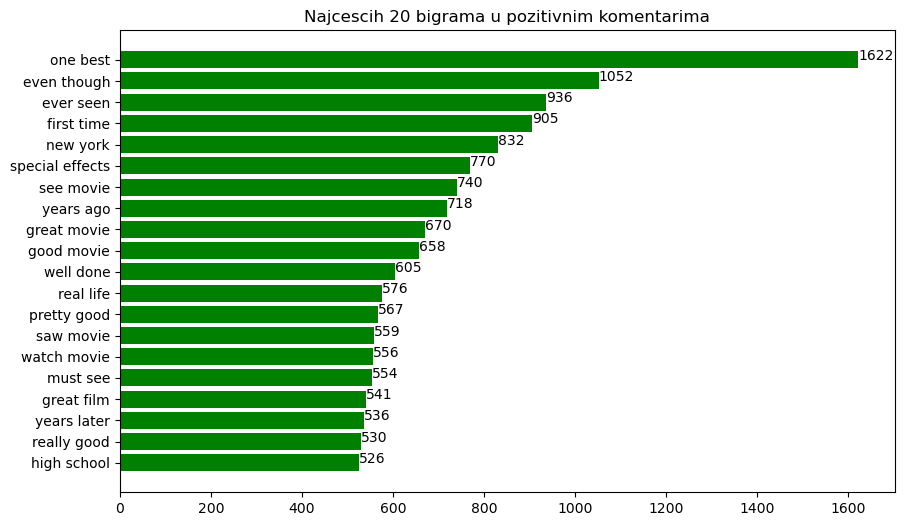

In [117]:
frequencies = [pair[1] for pair in freq_pos_2grams]
labels = [" ".join(pair[0]) for pair in freq_pos_2grams]

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], frequencies[::-1], color='green')
plt.title('Najcescih 20 bigrama u pozitivnim komentarima')

for index, value in enumerate(frequencies[::-1]):
    plt.text(value, index, str(value))


plt.show()

In [118]:
# 20 najcescih bigrama u negativnim komentarima
freq_neg_2grams = ngrams(all_words_neg, n=2, k=20)

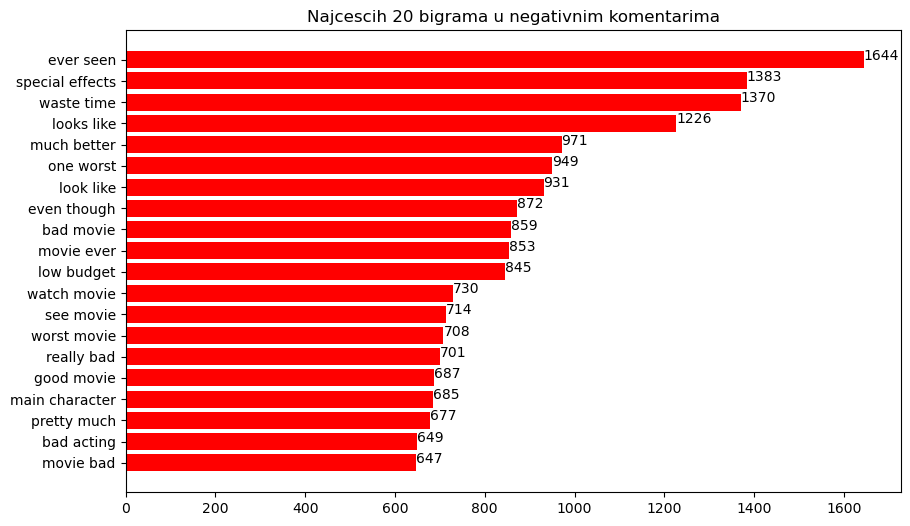

In [119]:
frequencies = [pair[1] for pair in freq_neg_2grams]
labels = [" ".join(pair[0]) for pair in freq_neg_2grams]

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], frequencies[::-1], color='red')
plt.title('Najcescih 20 bigrama u negativnim komentarima')

for index, value in enumerate(frequencies[::-1]):
    plt.text(value, index, str(value))

plt.show()

In [120]:
# 20 najcescih trigrama u pozitivnim komentarima
freq_pos_3grams = ngrams(all_words_pos, n=3, k=20)

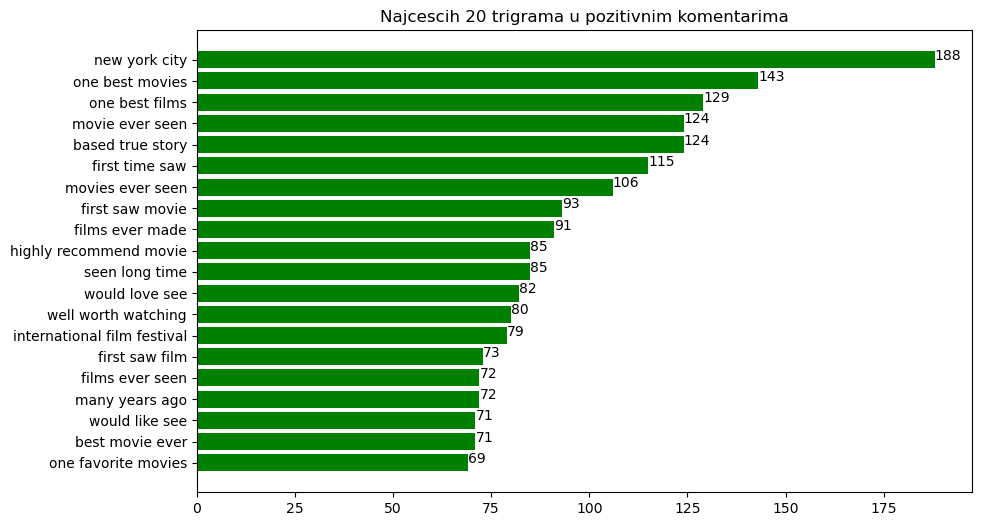

In [121]:
frequencies = [pair[1] for pair in freq_pos_3grams]
labels = [" ".join(pair[0]) for pair in freq_pos_3grams]

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], frequencies[::-1], color='green')
plt.title('Najcescih 20 trigrama u pozitivnim komentarima')

for index, value in enumerate(frequencies[::-1]):
    plt.text(value, index, str(value))

plt.show()

In [122]:
# 20 najcescih trigrama u negativnim komentarima
freq_neg_3grams = ngrams(all_words_neg, n=3, k=20)

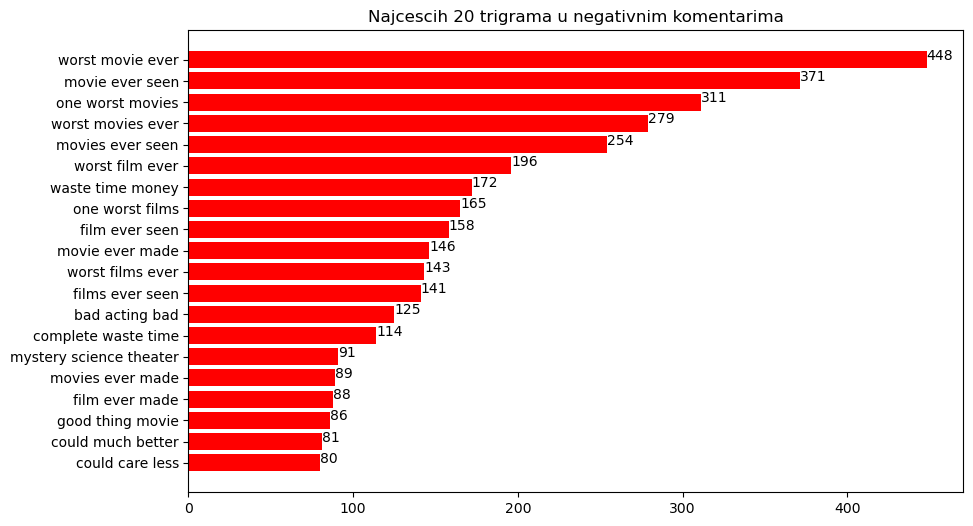

In [123]:
frequencies = [pair[1] for pair in freq_neg_3grams]
labels = [" ".join(pair[0]) for pair in freq_neg_3grams]

plt.figure(figsize=(10, 6))
plt.barh(labels[::-1], frequencies[::-1], color='red')
plt.title('Najcescih 20 trigrama u negativnim komentarima')

for index, value in enumerate(frequencies[::-1]):
    plt.text(value, index, str(value))

plt.show()